# Telecom Churn Analysis

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick # For specifying the axes tick format 

# Loading Data

In [2]:
dt = pd.read_csv('train.csv')

# Data Exploration


### 1. Performing initial data exploration to understand the data types, missing values, and summary statistics.


In [3]:
dt.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,3704-IEAXF,Female,0,Yes,Yes,72,No,No phone service,DSL,No,...,No,Yes,Yes,Yes,Two year,No,Credit card (automatic),53.65,3784,0
1,5175-AOBHI,Female,0,No,No,4,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,46.00,193.6,1
2,6922-NCEDI,Male,0,No,Yes,56,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,21.20,1238.65,0
3,3143-ILDAL,Male,0,No,No,56,Yes,Yes,Fiber optic,No,...,No,Yes,No,Yes,Month-to-month,Yes,Electronic check,94.45,5124.6,1
4,0872-NXJYS,Female,0,No,No,9,Yes,No,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,79.55,723.4,1


Each row represents a customer, each column contains customer’s attributes

In [4]:
dt.shape

(5282, 21)

In [5]:
dt.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
# Checking individual categories of our categorical columns
for col in dt.describe(include = 'object').columns:
    print(col)
    print(dt[col].unique())
    print('-'*30)

customerID
['3704-IEAXF' '5175-AOBHI' '6922-NCEDI' ... '6308-CQRBU' '3594-BDSOA'
 '6490-FGZAT']
------------------------------
gender
['Female' 'Male']
------------------------------
Partner
['Yes' 'No']
------------------------------
Dependents
['Yes' 'No']
------------------------------
PhoneService
['No' 'Yes']
------------------------------
MultipleLines
['No phone service' 'No' 'Yes']
------------------------------
InternetService
['DSL' 'No' 'Fiber optic']
------------------------------
OnlineSecurity
['No' 'No internet service' 'Yes']
------------------------------
OnlineBackup
['Yes' 'No' 'No internet service']
------------------------------
DeviceProtection
['No' 'No internet service' 'Yes']
------------------------------
TechSupport
['Yes' 'No' 'No internet service']
------------------------------
StreamingTV
['Yes' 'No' 'No internet service']
------------------------------
StreamingMovies
['Yes' 'No' 'No internet service']
------------------------------
Contract
['Two year' 

In [7]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5282 non-null   object 
 1   gender            5282 non-null   object 
 2   SeniorCitizen     5282 non-null   int64  
 3   Partner           5282 non-null   object 
 4   Dependents        5282 non-null   object 
 5   tenure            5282 non-null   int64  
 6   PhoneService      5282 non-null   object 
 7   MultipleLines     5282 non-null   object 
 8   InternetService   5282 non-null   object 
 9   OnlineSecurity    5282 non-null   object 
 10  OnlineBackup      5282 non-null   object 
 11  DeviceProtection  5282 non-null   object 
 12  TechSupport       5282 non-null   object 
 13  StreamingTV       5282 non-null   object 
 14  StreamingMovies   5282 non-null   object 
 15  Contract          5282 non-null   object 
 16  PaperlessBilling  5282 non-null   object 


- Insights:-
1. we see here so far we don't have any missiing value.
2. total charges column is of object type and we need to change it to numeric 

In [8]:
dt.describe()

,SeniorCitizen,tenure,MonthlyCharges,Churn
count,5282.000000,5282.000000,5282.000000,5282.000000
mean,0.162060,32.362931,64.856626,0.265430
std,0.368541,24.627623,30.171934,0.441604
min,0.000000,0.000000,18.400000,0.000000
25%,0.000000,9.000000,35.450000,0.000000
50%,0.000000,29.000000,70.500000,0.000000
75%,0.000000,55.750000,89.987500,1.000000
max,1.000000,72.000000,118.750000,1.000000


- Insights:- 
1. Senior citizen is actually a categorical column hence 25%-50%-75% distribution is not proper
2. 75% of customers have tenure less than 55 months
3. Average monthly charges are 64.85 where as where as 25% of customer pays more than 89.98

### 2. Visualizing the data to identify patterns.

In [9]:
churn_counts = dt['Churn'].value_counts()
churn_counts

0    3880
1    1402
Name: Churn, dtype: int64

In [10]:
#Lets  convert it to percentage and try to find some insights
churn_percentage = churn_counts / churn_counts.sum() * 100
churn_percentage

0    73.457024
1    26.542976
Name: Churn, dtype: float64

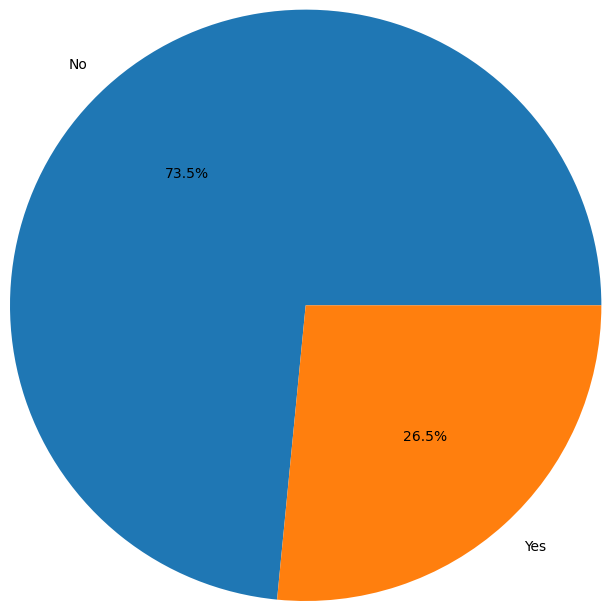

In [11]:
c_label = ['No', 'Yes']
plt.pie(churn_counts ,labels=c_label, autopct='%0.1f%%' , radius=2) 
#plt.title("Churn Percentage")
plt.show()

- Insights:-Data is highly inbalanced

# Data Preprocessing

### Converting categorical variables into numerical form.

- Creating a copy of base data. our original data was stored in 'dt' and we have created a copy named 'df'

In [12]:
df = dt.copy()

In [13]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [ ]:
# code dalna hai yha

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5282 non-null   object 
 1   gender            5282 non-null   object 
 2   SeniorCitizen     5282 non-null   int64  
 3   Partner           5282 non-null   object 
 4   Dependents        5282 non-null   object 
 5   tenure            5282 non-null   int64  
 6   PhoneService      5282 non-null   object 
 7   MultipleLines     5282 non-null   object 
 8   InternetService   5282 non-null   object 
 9   OnlineSecurity    5282 non-null   object 
 10  OnlineBackup      5282 non-null   object 
 11  DeviceProtection  5282 non-null   object 
 12  TechSupport       5282 non-null   object 
 13  StreamingTV       5282 non-null   object 
 14  StreamingMovies   5282 non-null   object 
 15  Contract          5282 non-null   object 
 16  PaperlessBilling  5282 non-null   object 


In [15]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        8
Churn               0
dtype: int64

- Insight:- Here we see that the TotalCharges has 8 missing values. Let's check this data.

In [16]:
df[df['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
350,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,0
583,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,0
1592,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,0
4425,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,0
4747,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,0
4971,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,0
5028,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN,0
5260,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,0


- Insight :- It can also be noted that the Tenure column is 0 for these entries even though the MonthlyCharges column is not empty.
Let's see if there are any other 0 values in the tenure column.

In [17]:
df[df['tenure'] == 0].index

Int64Index([350, 583, 1592, 4425, 4747, 4971, 5028, 5260], dtype='int64')

- Insight :- There are no additional missing values in the Tenure column.

### Missing value treatment

Let's delete the rows with missing values as the rows in TotalCharges having 'NaN' as values, the same rows have Tenure as 0, additionally the percentage of these records as compared to total data set is 0.15%, deleting them will be the best possible option.  

In [18]:
df.dropna(inplace=True)

In [19]:
df[df['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


- Customer ID is not essential for our purpose so, Let's drop it.

In [20]:
df = df.drop(['customerID'], axis = 1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,Yes,72,No,No phone service,DSL,No,Yes,No,Yes,Yes,Yes,Two year,No,Credit card (automatic),53.65,3784.00,0
1,Female,0,No,No,4,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,46.00,193.60,1
2,Male,0,No,Yes,56,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,21.20,1238.65,0
3,Male,0,No,No,56,Yes,Yes,Fiber optic,No,Yes,No,Yes,No,Yes,Month-to-month,Yes,Electronic check,94.45,5124.60,1
4,Female,0,No,No,9,Yes,No,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,79.55,723.40,1


# Exploratory Data Analysis

Let's explore our data set, to better understand the patterns in the data and potentially form some hypothesis. First we will look at the distribution of individual variables and then slice and dice our data for any interesting trends.

**A.) Demographics** - Let us first understand the gender, age range, partner, and dependent status of the customers


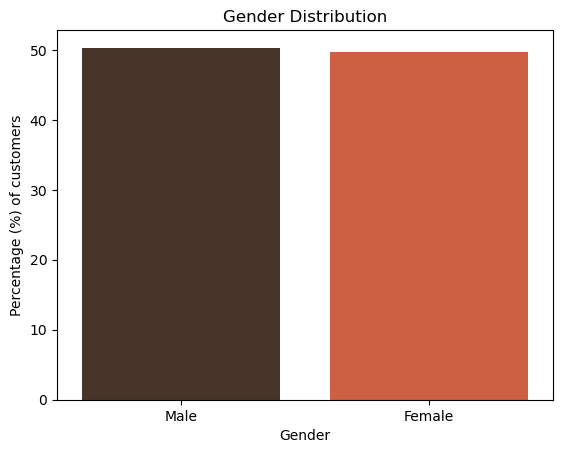

In [21]:
# Calculate gender percentages
gender_percentages = df['gender'].value_counts(normalize=True) * 100

# Create a bar chart
sns.barplot(x=gender_percentages.index, y=gender_percentages.values, palette=['#4D3425', '#E4512B'])

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Percentage (%) of customers')
plt.title('Gender Distribution')

# Add percentage labels on top of bars
for index, value in enumerate(gender_percentages):
    plt.text(index, value, f'{value:.1f}%', ha='center', va='bottom', fontsize=12, color='white')

plt.show()

**Gender Distribution** - About half of the customers in our data set are male while the other half are female

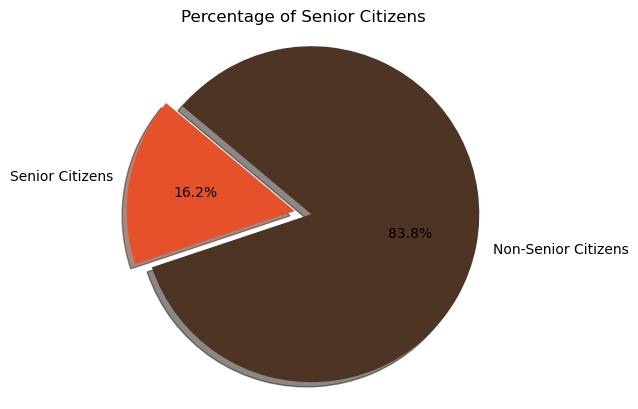

In [22]:
# Calculate the percentage of senior citizens
senior_citizen_percentage = (dt['SeniorCitizen'].sum() / len(df)) * 100
non_senior_citizen_percentage = 100 - senior_citizen_percentage

# Create a pie chart
labels = ['Senior Citizens', 'Non-Senior Citizens']
sizes = [senior_citizen_percentage, non_senior_citizen_percentage]
colors = ['#E4512B', '#4D3425']
explode = (0.1, 0)  # Explode the first slice (i.e., 'Senior Citizens')

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Percentage of Senior Citizens')
plt.show()

**%Senior Citizens** - Only 16.2% of customers are senior citizens and most of the customers are young

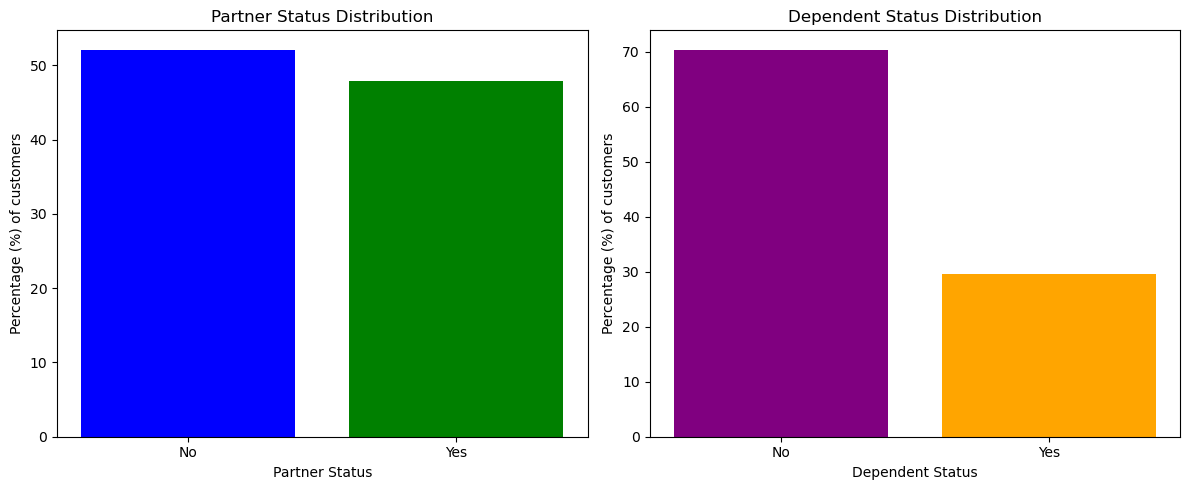

In [23]:
# Calculate the percentages of partner and dependent statuses
partner_percentages = df['Partner'].value_counts(normalize=True) * 100
dependent_percentages = df['Dependents'].value_counts(normalize=True) * 100

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Create bar plots for partner status
axes[0].bar(partner_percentages.index, partner_percentages.values, color=['blue', 'green'])
axes[0].set_xlabel('Partner Status')
axes[0].set_ylabel('Percentage (%) of customers')
axes[0].set_title('Partner Status Distribution')

# Create bar plots for dependent status
axes[1].bar(dependent_percentages.index, dependent_percentages.values, color=['purple', 'orange'])
axes[1].set_xlabel('Dependent Status')
axes[1].set_ylabel('Percentage (%) of customers')
axes[1].set_title('Dependent Status Distribution')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


**Partner and dependent status** - About 50% of the customers have a partner, while only 30% of the total customers have dependents.

**B.)Customer Account Information:** Let u now look at the tenure, contract

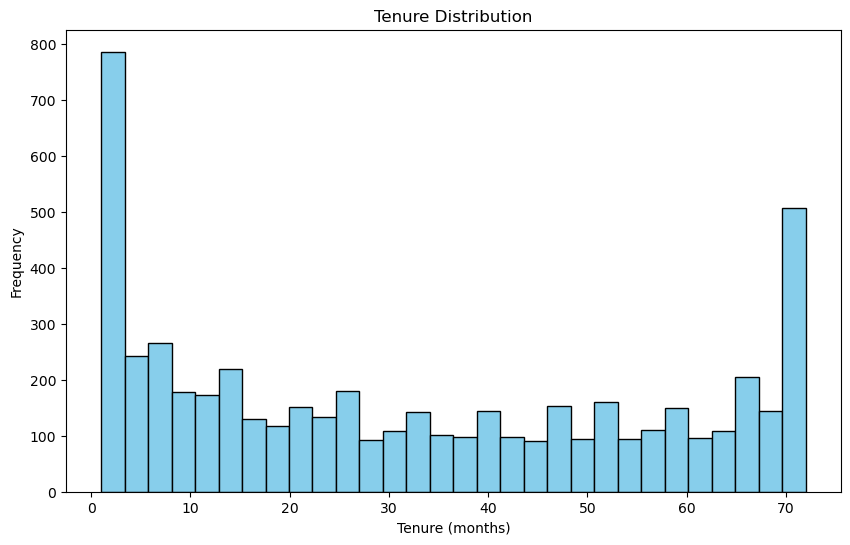

In [24]:
# Create a histogram for the "tenure" column
plt.figure(figsize=(10, 6))
plt.hist(df['tenure'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Tenure (months)')
plt.ylabel('Frequency')
plt.title('Tenure Distribution')

plt.show()

**Tenure -** A lot of customers are with company for just first few months while many are there above 70 months, this could be because of different types of contract .Thus based on the contract they are into it could be more/less easier for the customers to stay/leave the telecom company.

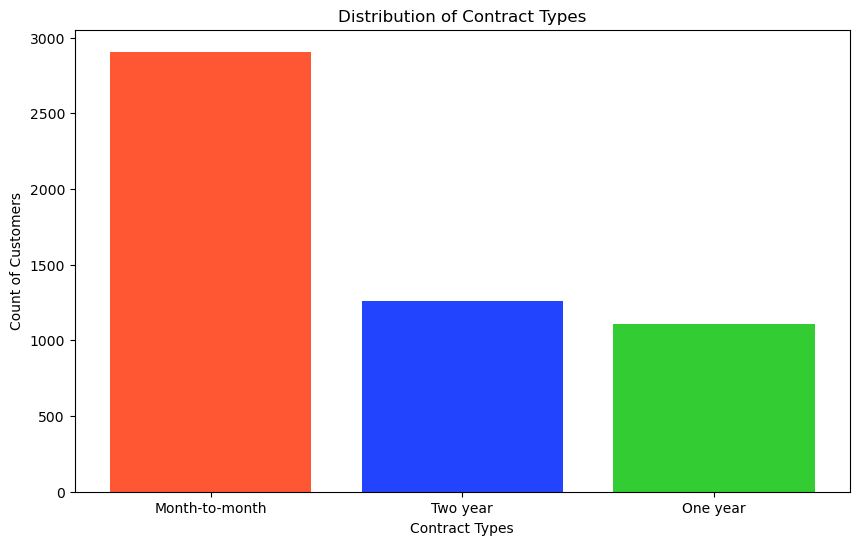

In [25]:
# Calculate the counts of each contract type
contract_counts = df['Contract'].value_counts()

# Create a bar chart for the distribution of contract types
plt.figure(figsize=(10, 6))
plt.bar(contract_counts.index, contract_counts.values, color = ['#ff5733', '#2244ff', '#33cc33'])
plt.title('Distribution of Contract Types')
plt.xlabel('Contract Types')
plt.ylabel('Count of Customers')
plt.show()

**Contract Type-** Most of the customers are in the month to month contract. While there are equal number of customers in the 1 year and 2 year contracts.

**C.)Customer service Information-** Let us now look at the distribution of various services used by customers

In [26]:
df.columns.values

array(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

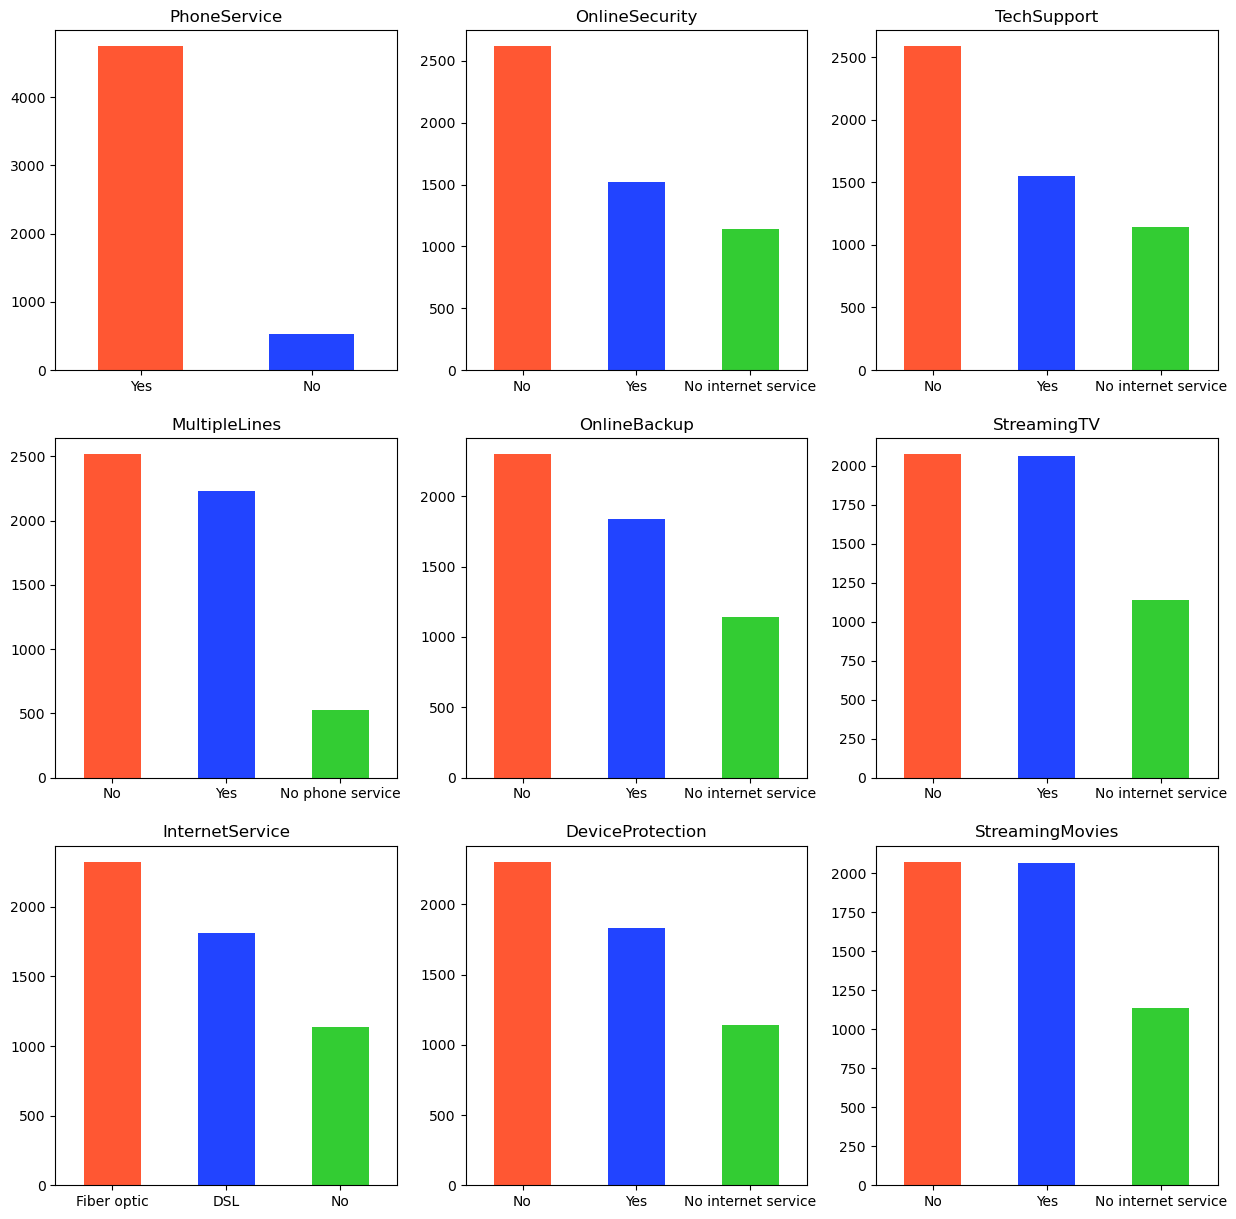

In [27]:
# List of services
services = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
            'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Create subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
colors = ['#ff5733', '#2244ff', '#33cc33']
# Loop through services and create subplots
for i, item in enumerate(services):
    if i < 3:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0, color=colors)
        
    elif i >=3 and i < 6:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0,color=colors)
        
    elif i < 9:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0,color=colors)
    ax.set_title(item)

**D.)Churn vs all-** let's take a look at out predictor variable (Churn) and understand its interaction with other important variables .

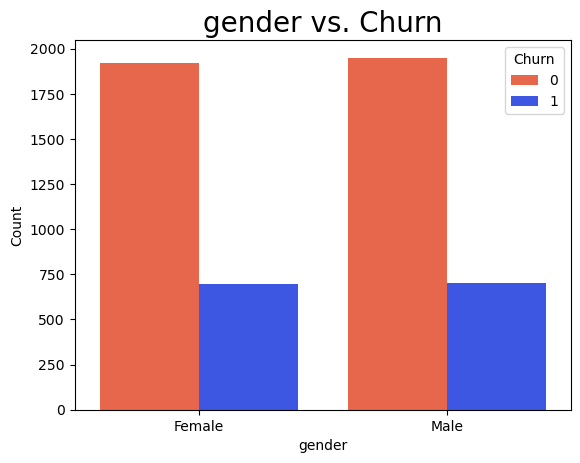

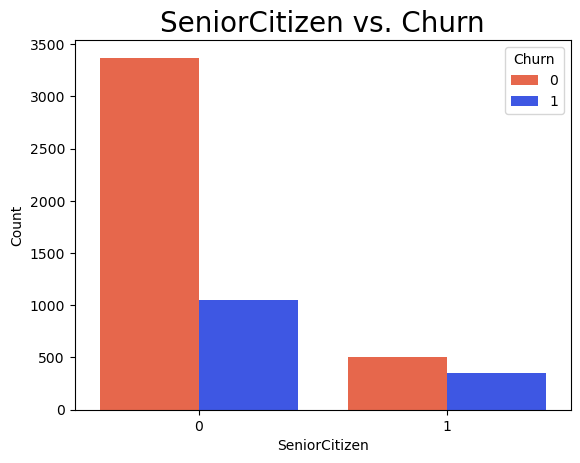

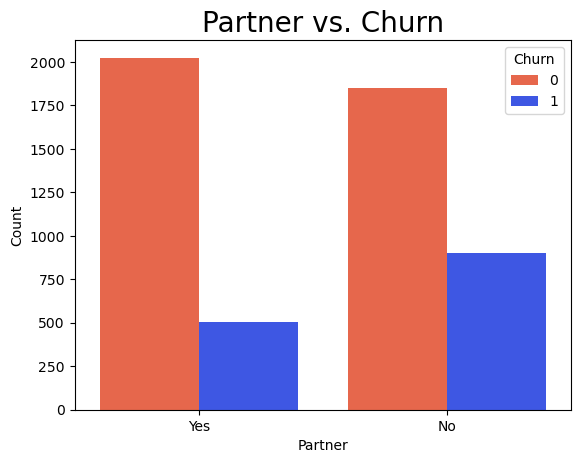

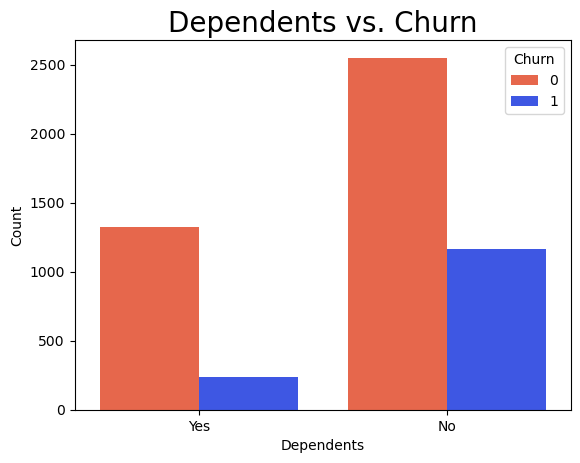

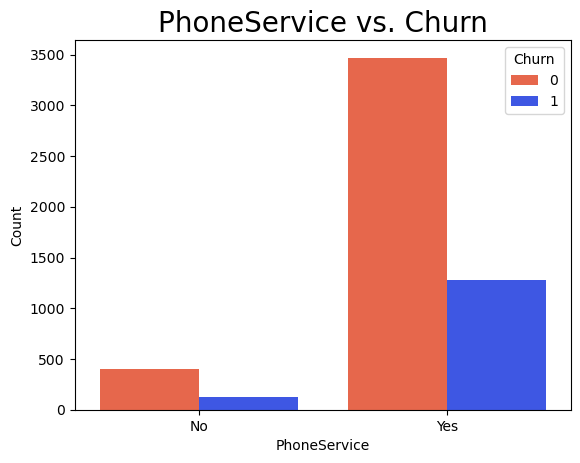

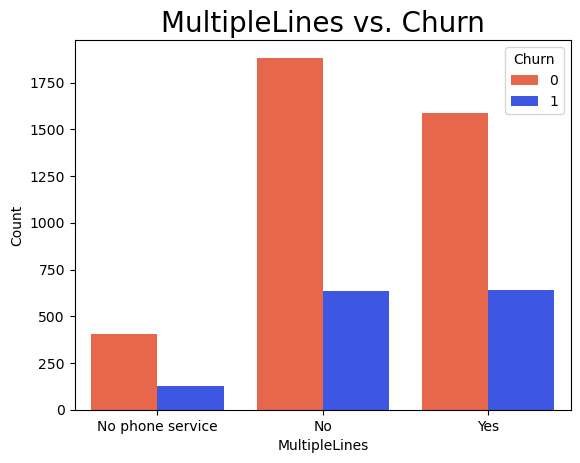

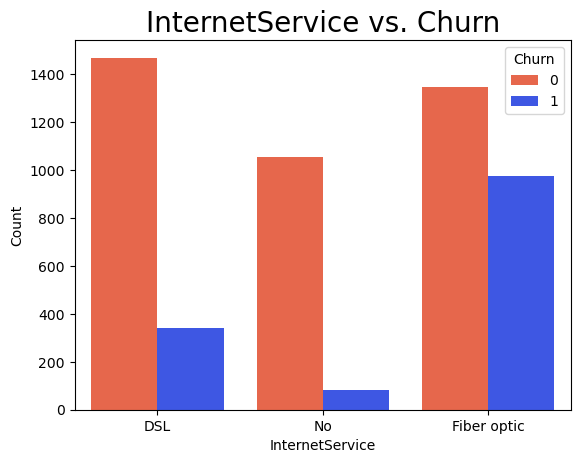

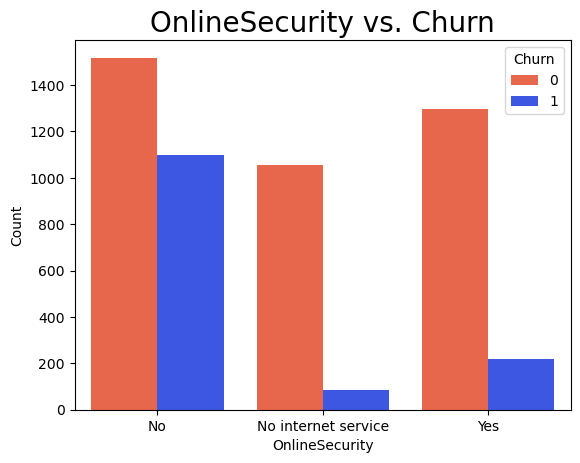

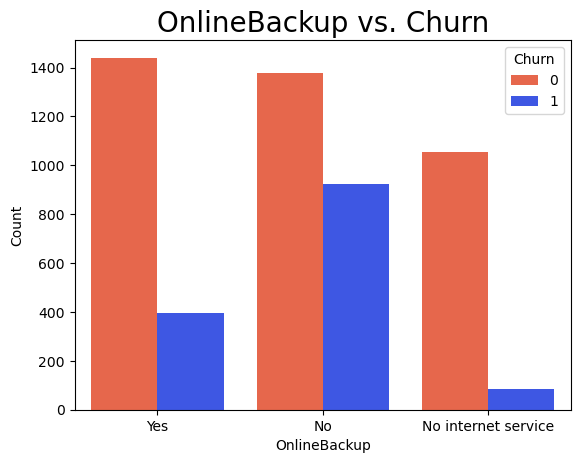

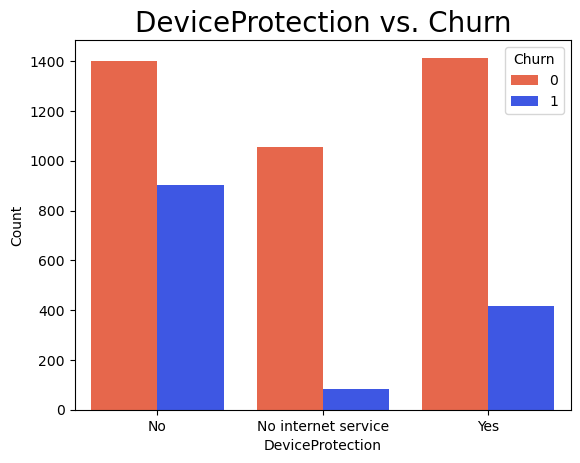

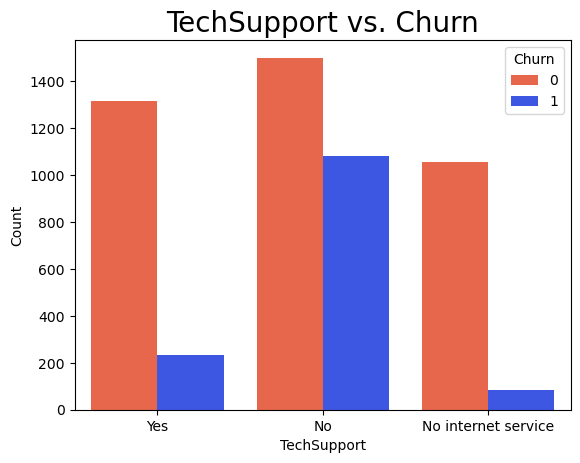

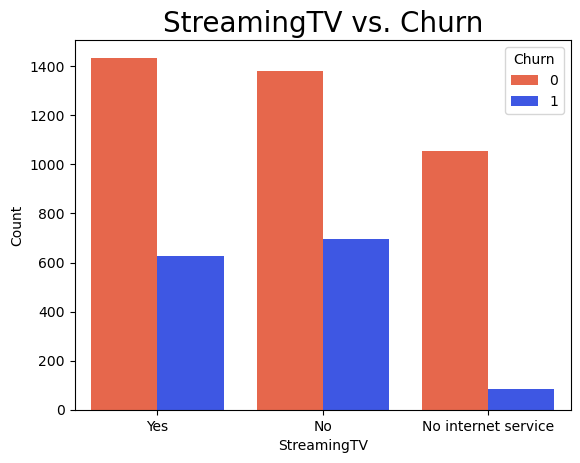

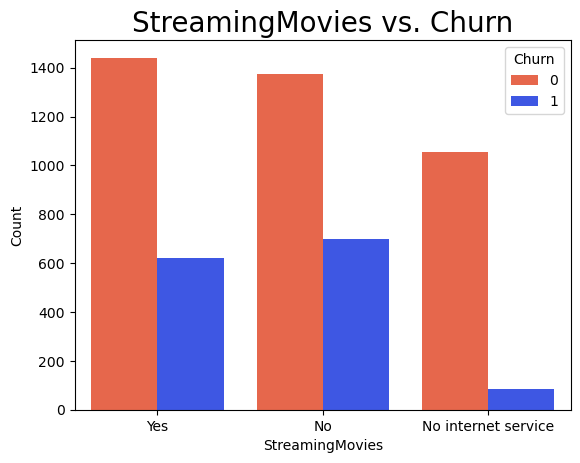

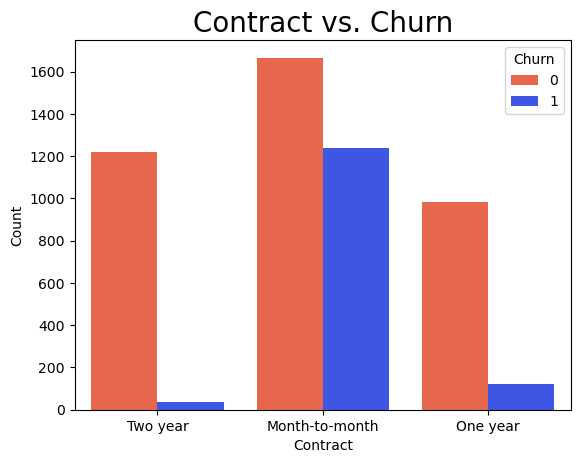

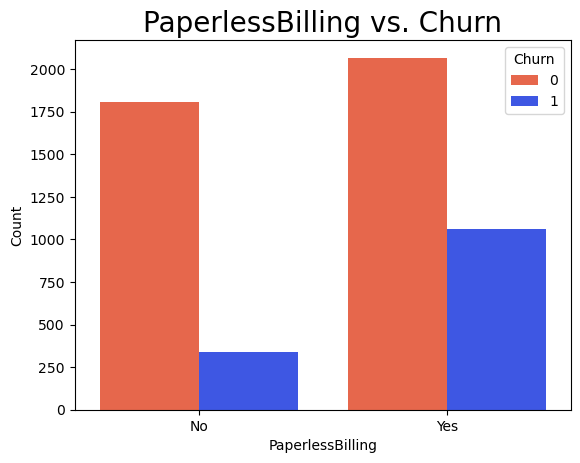

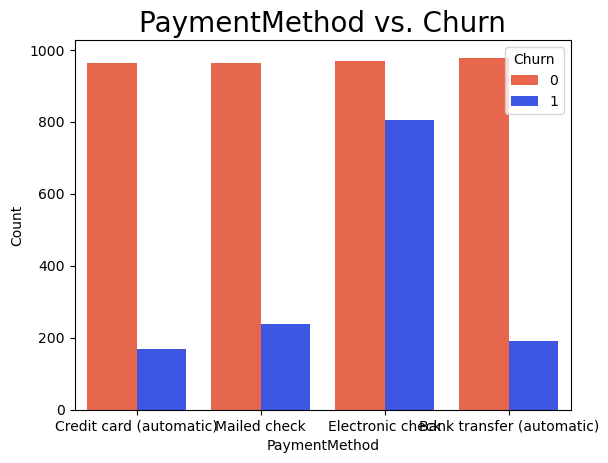

In [28]:
# Define custom color palette
custom_palette = ['#ff5733', '#2244ff', '#33cc33']

# Select categorical columns to plot
columns_to_plot = df.drop(['Churn', 'TotalCharges', 'MonthlyCharges', 'tenure'], axis=1)

# Loop through columns and create subplots
for col in columns_to_plot:
    sns.countplot(data=df, x=col, hue='Churn', palette=custom_palette)
    plt.title(f'{col} vs. Churn', size=20)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

## Categories More Likely to Churn

1. **Dependents vs Churn:** Customers without dependents are more likely to churn.
2. **Partner vs Churn:** Customers that don't have partners are more likely to churn.
3. **Contract vs Churn:** More Month-to-Month Contract customers opted to move out compared to customers with One Year Contract and Two Year Contract.
4. **SeniorCitizen vs Churn:** Most senior citizens churn.
5. **Payment Method vs Churn:** The majority of customers who moved out were using Electronic Check as their payment method.
6. **Paperless Billing vs Churn:** Customers with Paperless Billing are more likely to churn.
7. **TechSupport vs Churn:** Customers with no Tech Support are more likely to switch to another service provider.
8. **Device Protection vs Churn:** Customers without device protection are more likely to churn.
9. **Online Security vs Churn:** Most customers churn in the absence of online security.
10. **Internet Service vs Churn:** Customers who use Fiber optic internet service have a higher churn rate.


**11.Tenure vs Churn-** 

<Axes: xlabel='Churn', ylabel='tenure'>

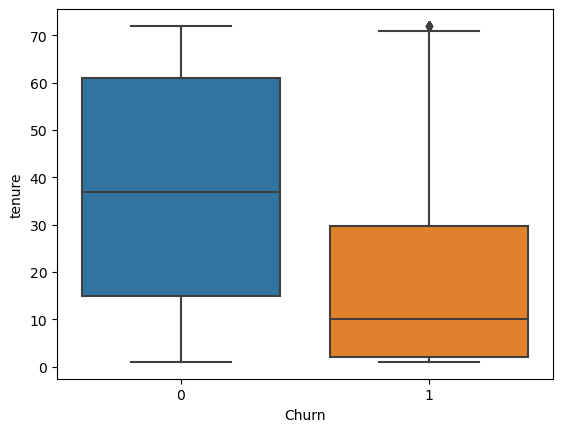

In [29]:
sns.boxplot(x = df.Churn, y = df.tenure)

**Group the tenure in bins of 12 months**

In [30]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

df['tenure_group'] = pd.cut(df.tenure, range(1, 80, 12), right=False, labels=labels)

In [31]:
df['tenure_group'].value_counts()

1 - 12     1644
61 - 72    1061
13 - 24     752
25 - 36     624
49 - 60     610
37 - 48     583
Name: tenure_group, dtype: int64

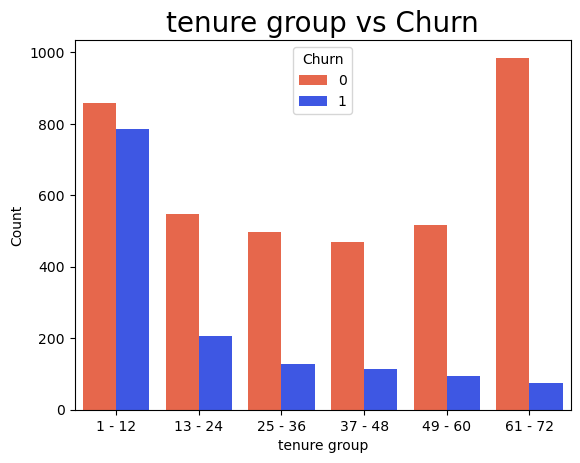

In [32]:
sns.countplot(data=df, x=df['tenure_group'], hue='Churn', palette=custom_palette)
plt.title('tenure group vs Churn', size=20)
plt.xlabel('tenure group')
plt.ylabel('Count')
plt.show()

- As we can see form the box plot, the customers who do not churn, they tend to stay for a longer tenure with the telecom company.
- New customers are more likely to churn

**E.) Now let's take a quick look at the relation between monthly and total charges**

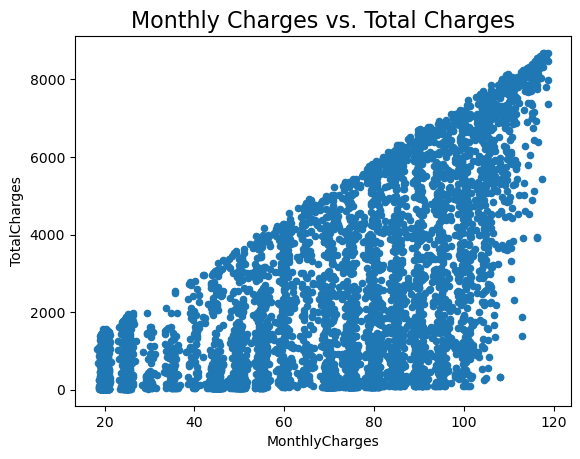

In [33]:
df[['MonthlyCharges', 'TotalCharges']].plot.scatter(x = 'MonthlyCharges',
                                                              y='TotalCharges')
plt.title('Monthly Charges vs. Total Charges', size=16)
plt.show()

-  the total charges increases as the monthly bill for a customer increases.

**Churn vs MonthlyCharges**

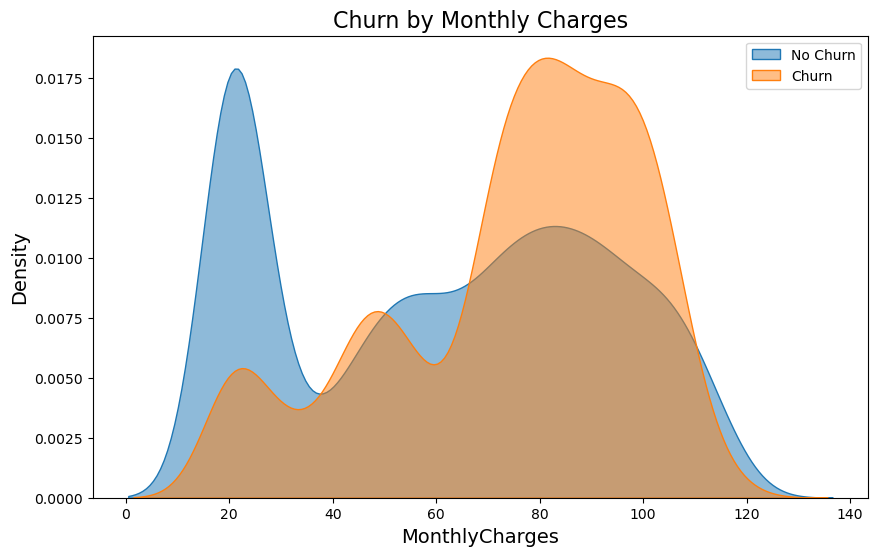

In [34]:
plt.figure(figsize=(10, 6))

# Filter the data for Churn 0 and Churn 1 separately and then create KDE plots
data_churn_0 = df[df['Churn'] == 0]['MonthlyCharges']
data_churn_1 = df[df['Churn'] == 1]['MonthlyCharges']

sns.kdeplot(data=data_churn_0, label='Churn 0', fill=True, common_norm=False, alpha=0.5)
sns.kdeplot(data=data_churn_1, label='Churn 1', fill=True, common_norm=False, alpha=0.5)

# Set plot labels and title
plt.title('Churn by Monthly Charges', size=16)
plt.xlabel('MonthlyCharges', size=14)
plt.ylabel('Density', size=14)

# Show the legend
plt.legend(["No Churn", "Churn"], loc='upper right')
plt.show()

**Churn vs Monthly Charges:** Higher % of customers churn when the monthly charges are high.

**Churn vs TotalCharges**

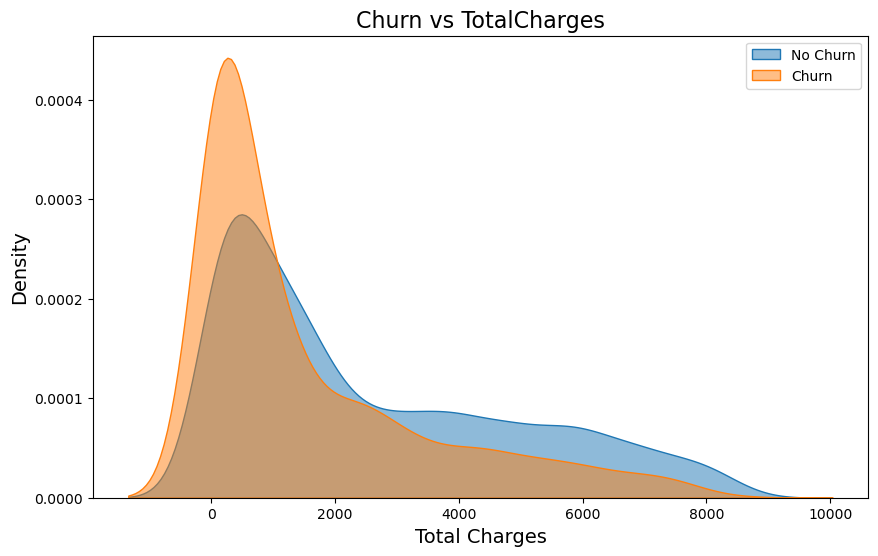

In [35]:
plt.figure(figsize=(10, 6))

# Filter the data for Churn 0 and Churn 1 separately and then create KDE plots
data_churn_0 = df[df['Churn'] == 0]['TotalCharges']
data_churn_1 = df[df['Churn'] == 1]['TotalCharges']

sns.kdeplot(data=data_churn_0, label='Churn 0', fill=True, common_norm=False, alpha=0.5)
sns.kdeplot(data=data_churn_1, label='Churn 1', fill=True, common_norm=False, alpha=0.5)

# Set plot labels and title
plt.title('Churn vs TotalCharges', size=16)
plt.xlabel('Total Charges', size=14)
plt.ylabel('Density', size=14)

# Show the legend
plt.legend(["No Churn", "Churn"], loc='upper right')
plt.show()

**Churn vs TotalCharges-** It seems that there is higer churn when the total charges are lower.

**F.)Correlation of Churn with other variables**

In [36]:
# create dummy variables
df_dummies = pd.get_dummies(df)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,72,53.65,3784.00,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
1,0,4,46.00,193.60,1,1,0,1,0,1,...,0,0,0,1,1,0,0,0,0,0
2,0,56,21.20,1238.65,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,56,94.45,5124.60,1,0,1,1,0,1,...,0,0,1,0,0,0,0,0,1,0
4,0,9,79.55,723.40,1,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0


<Axes: >

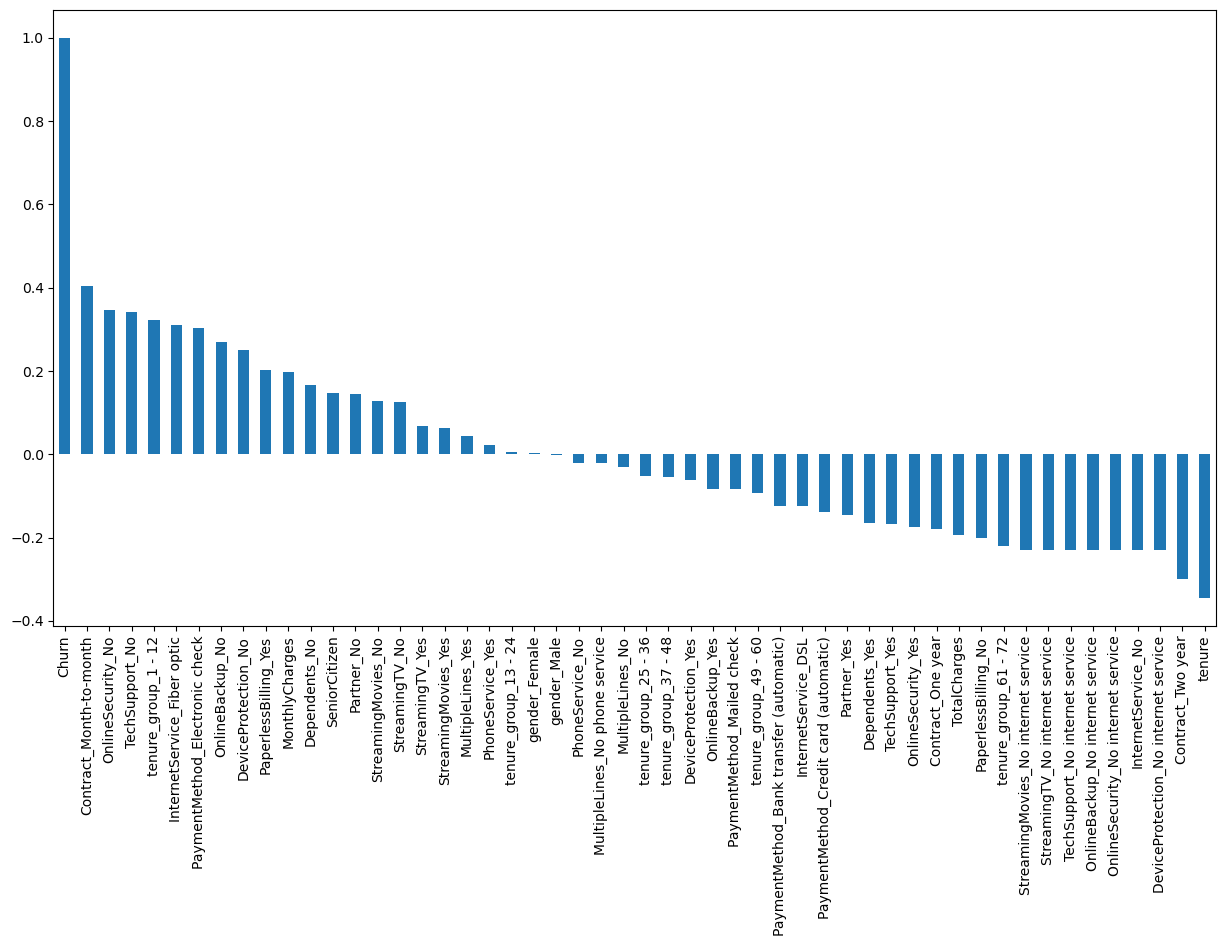

In [37]:
plt.figure(figsize=(15,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

- Month to month contracts, absence of online security and tech support seem to be positively correlated with churn. While, tenure, two year contracts seem to be negatively correlated with churn.

- services such as Long term contracts, Subscriptions without internet service and the customers engaged for 5+ years.

- Factors like Gender, Availability of PhoneService and multiple lines have alomost NO impact on Churn.

In [73]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5274 entries, 0 to 5281
Data columns (total 52 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            5274 non-null   int64  
 1   tenure                                   5274 non-null   int64  
 2   MonthlyCharges                           5274 non-null   float64
 3   TotalCharges                             5274 non-null   float64
 4   Churn                                    5274 non-null   int64  
 5   gender_Female                            5274 non-null   uint8  
 6   gender_Male                              5274 non-null   uint8  
 7   Partner_No                               5274 non-null   uint8  
 8   Partner_Yes                              5274 non-null   uint8  
 9   Dependents_No                            5274 non-null   uint8  
 10  Dependents_Yes                           5274 no

# After going through the above EDA we will develop some predictive models and compare them.